In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('test.txt', 'r+') as archivo:
    # Leer la primera línea y guardarla en una variable
    header = archivo.readline()
    
    # Leemos la matriz de frecuencias del archivo de texto
    adj_matrix = np.genfromtxt(archivo, delimiter=' ')

# Imprimir la primera línea
print(header)
labels = header.split()

# Imprime la matriz
print(adj_matrix)
print("Tamaño de la matriz de adyacencia:", len(adj_matrix))
print("Tamaño de la cabecera:", len(labels))

PROBLEM1-20 PROBLEM1-40 PROBLEM1-60 PROBLEM1-80 PROBLEM1-100 PROBLEM2-20 PROBLEM2-40 PROBLEM2-80 PROBLEM2-60 PROBLEM3-20 PROBLEM3-40 PROBLEM4-20 PROBLEM4-40 PROBLEM5-20 PROBLEM5-40 PROBLEM5-80 PROBLEM5-60 PROBLEM5-100 PROBLEM6-20 PROBLEM6-40 PROBLEM6-60 PROBLEM6-80 PROBLEM6-100 PROBLEM7-20 PROBLEM7-40 PROBLEM7-60 PROBLEM8-20 PROBLEM8-40 PROBLEM8-60 PROBLEM9-20 PROBLEM9-40 PROBLEM9-60 PROBLEM3-60 PROBLEM4-60 PROBLEM2-100 PROBLEM3-80 PROBLEM3-100 PROBLEM4-80 PROBLEM4-100 PROBLEM7-80 PROBLEM7-100 PROBLEM8-80 PROBLEM8-100 START END  

[[  0. 228.   0. ...   0.   0. 397.]
 [  0.   0.  23. ...   0.   0. 118.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   1.]
 [628.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Tamaño de la matriz de adyacencia: 45
Tamaño de la cabecera: 45


In [3]:
# Matriz vacía en la que insertaremos las diferentes aristas
edges = []

# Recorrido de la matriz original
for row in adj_matrix:
    new_row = []
    for element in row:
        if (element > 0):
            new_row.append(1)
        else:
            new_row.append(0)
    edges.append(new_row)

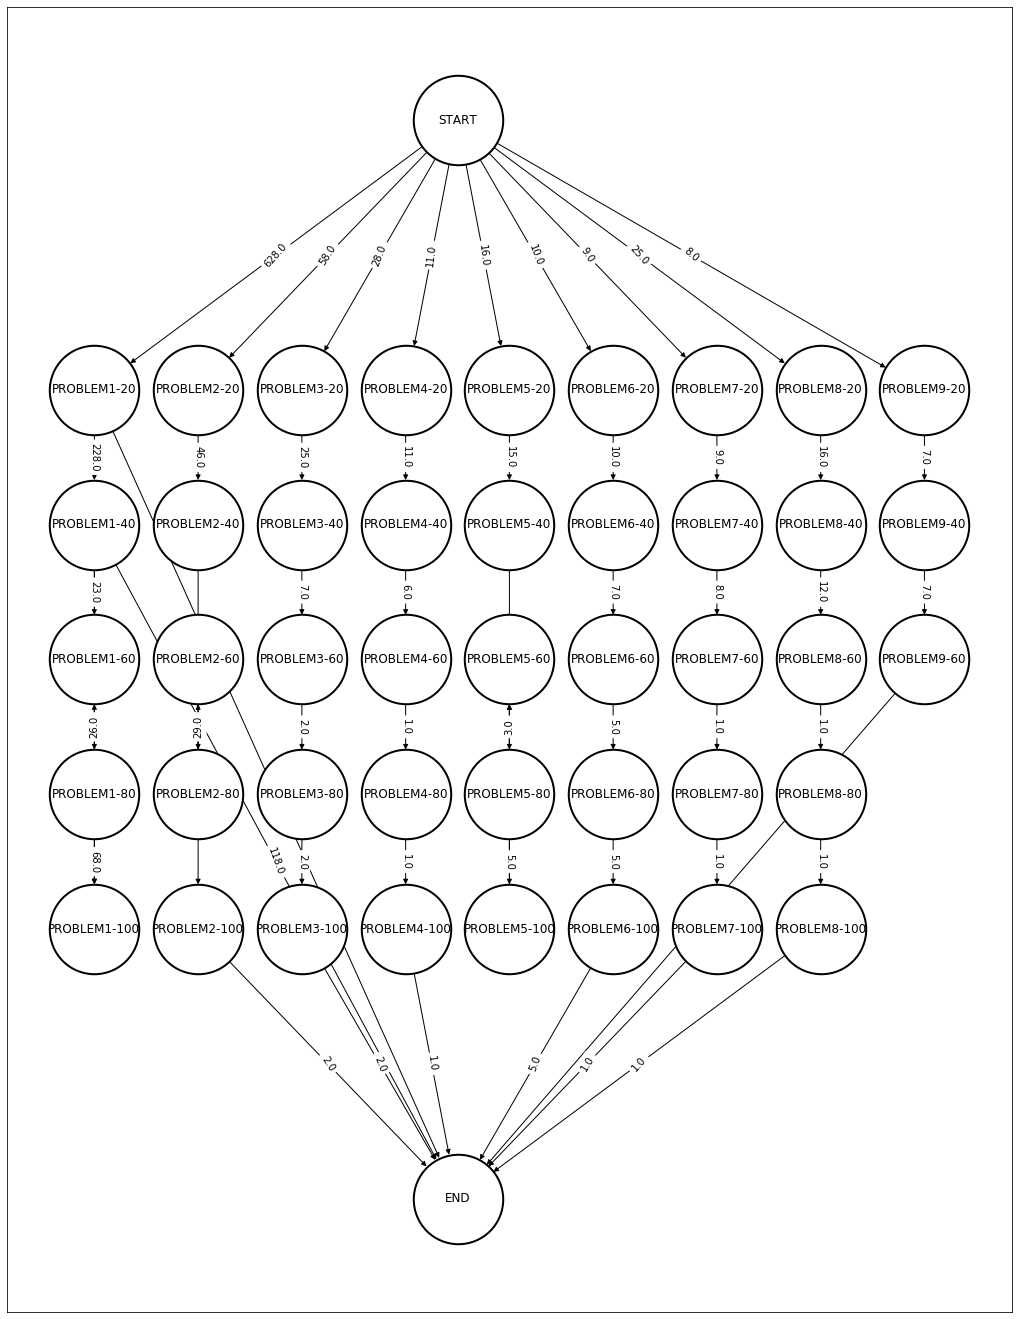

In [44]:
# Crear un grafo vacío
grafo = nx.DiGraph()

# Agregar nodos al grafo
grafo.add_nodes_from(labels)

# Agregar aristas al grafo
for i in range(len(edges)):
    for j in range(len(edges)):
        if edges[i][j] == 1:
            grafo.add_edge(labels[i], labels[j], weight=adj_matrix[i][j])

# Posiciones horizontales
horizontal = []
pos_ini = 0
for i in range(len(labels)-2):
    horizontal.append(pos_ini)
    pos_ini+=2
    
# Posiciones verticales
vertical = {20:-3,40:-6,60:-9,80:-12,100:-15}


# Definir la posición de los nodos
max_problem = 0
pos = {}
for i in range(len(labels)-2):
    label = labels[i]
    r, j = label.split('-')
    r = int(r[7:])
    if (r > max_problem):
        max_problem = r
    j = int(j)
    pos[label] = (horizontal[r], vertical[j])
        
pos['START'] = (max_problem,3)
pos['END'] = (max_problem,-21)
        
# Crear una figura de tamaño 10x10 pulgadas
plt.figure(figsize=(18, 24))

# Agregamos las etiquetas a los nodos
etiquetas_nodos = nx.get_node_attributes(grafo, 'label')
nx.draw_networkx_labels(grafo, pos, etiquetas_nodos, font_size=9, font_family="sans-serif")
# Agregamos las etiquetas a las aristas
edge_labels = nx.get_edge_attributes(grafo, "weight")
nx.draw_networkx_edge_labels(grafo, pos, edge_labels)

# Dibujar el grafo con posiciones fijas
nx.draw_networkx(grafo, pos=pos, node_shape='o', node_size=8000, node_color="white", edgecolors="black", linewidths=2)
plt.show()